<a href="https://colab.research.google.com/github/nati5174/Diabetes-Prediction/blob/main/Diabetes_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

Exploratory Data Analysis

In [ ]:
#read the data set

df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<Axes: xlabel='Age', ylabel='Count'>

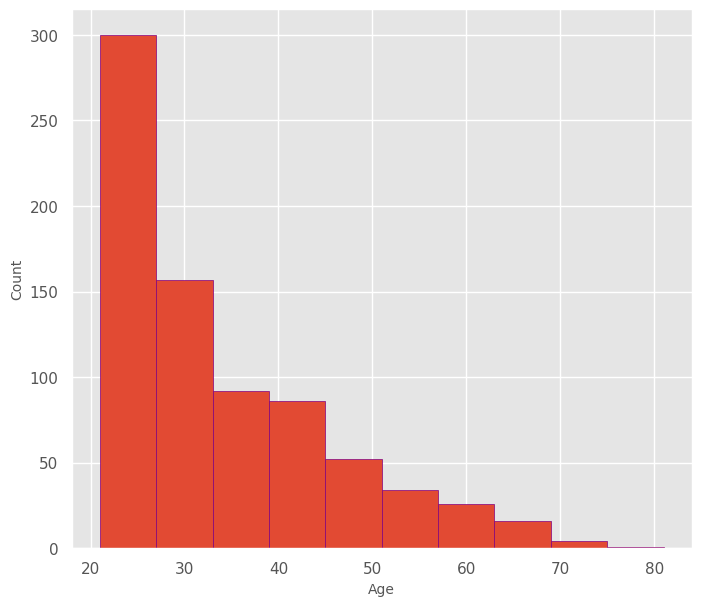

In [ ]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="purple")

In [ ]:
df['Age'].max()

81

In [ ]:
df['Age'].min()

21

<Axes: xlabel='Age', ylabel='Density'>

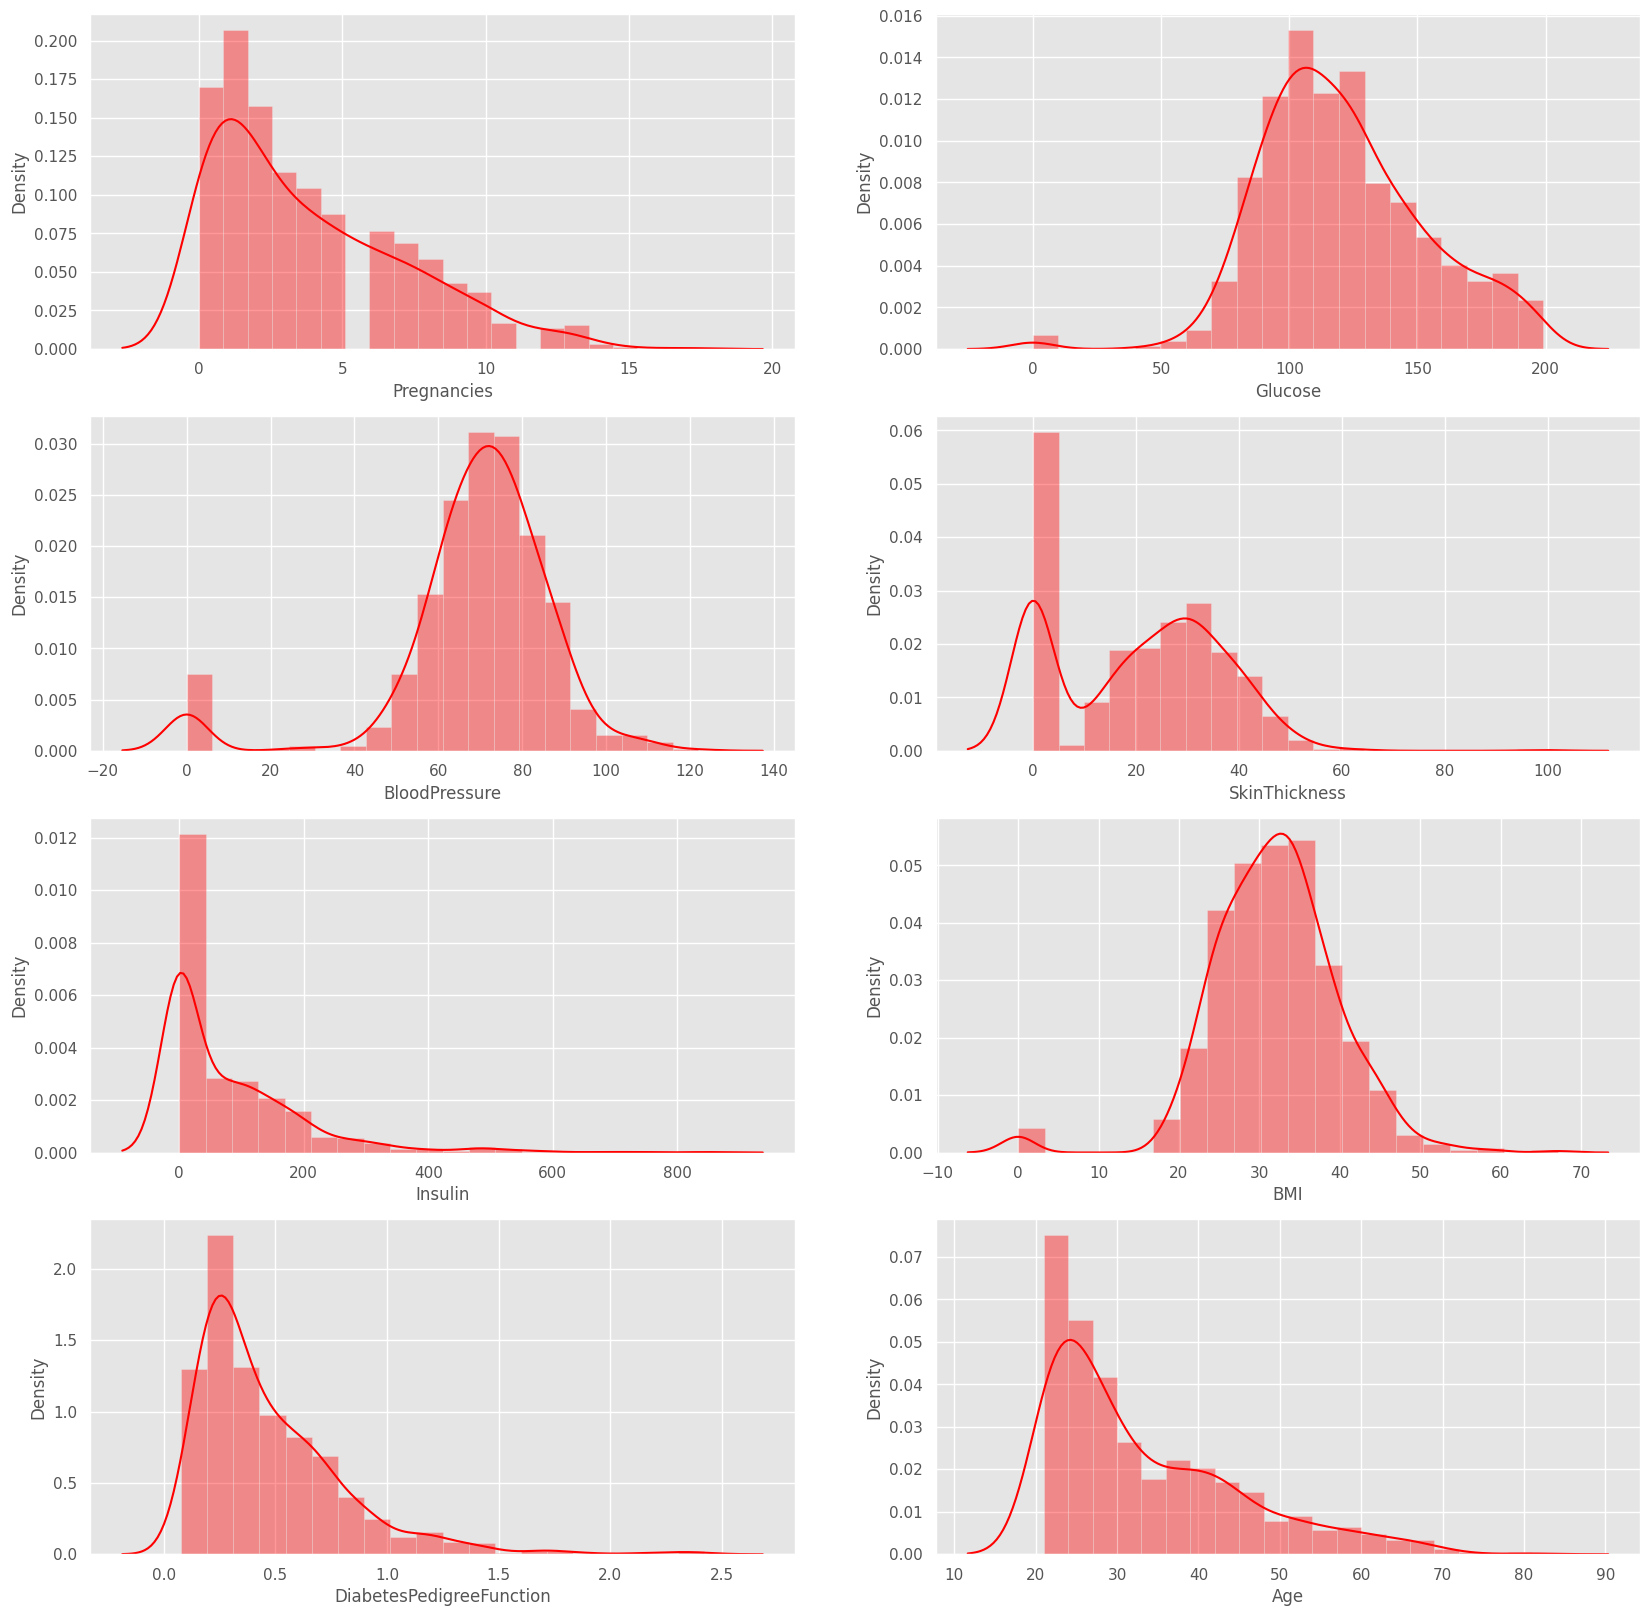

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(20, 20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0, 0], color='red')
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [ ]:
df.groupby("Outcome").agg({'Pregnancies': 'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
(df['Outcome'].value_counts() / 768)*100

,count
Outcome,
0,65.104167
1,34.895833


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


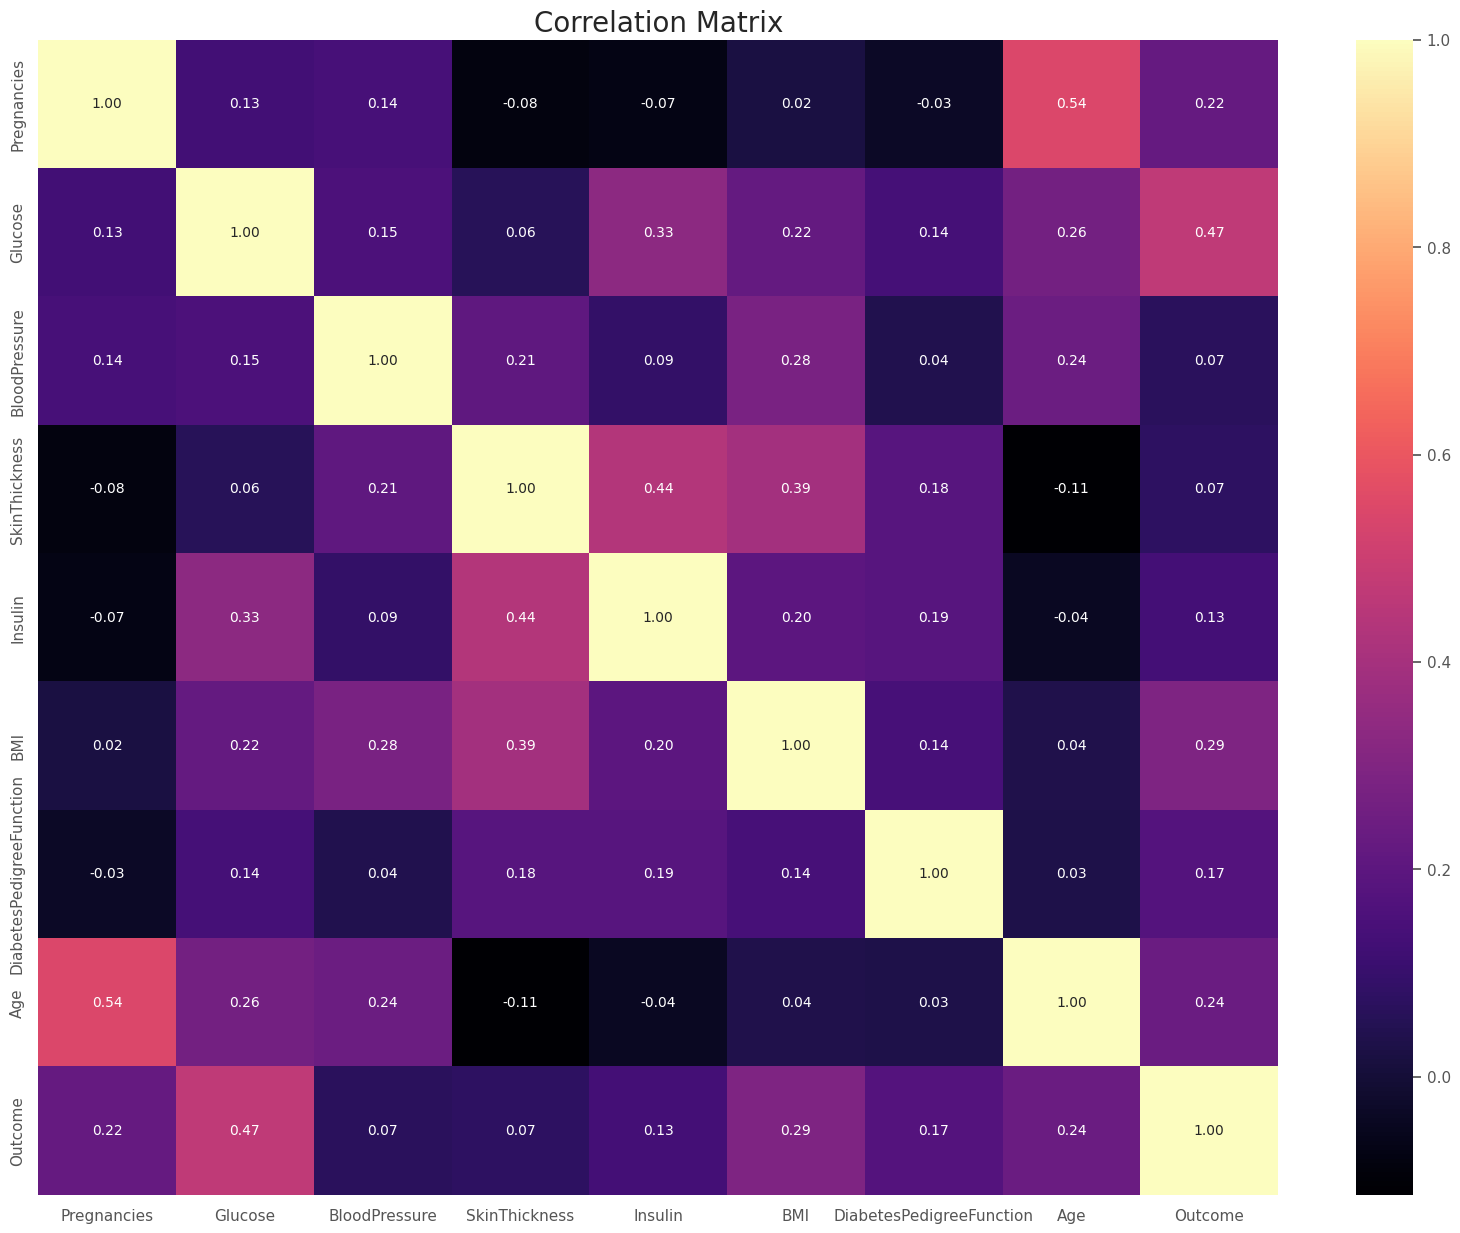

In [ ]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Data Preprocessing

In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


the above is wrong however, we will have missing values, its just theyve been listed as 0

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [ ]:
df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1.0,93.0,70.0,31.0,NaN,30.4,0.315,23,0


<Axes: >

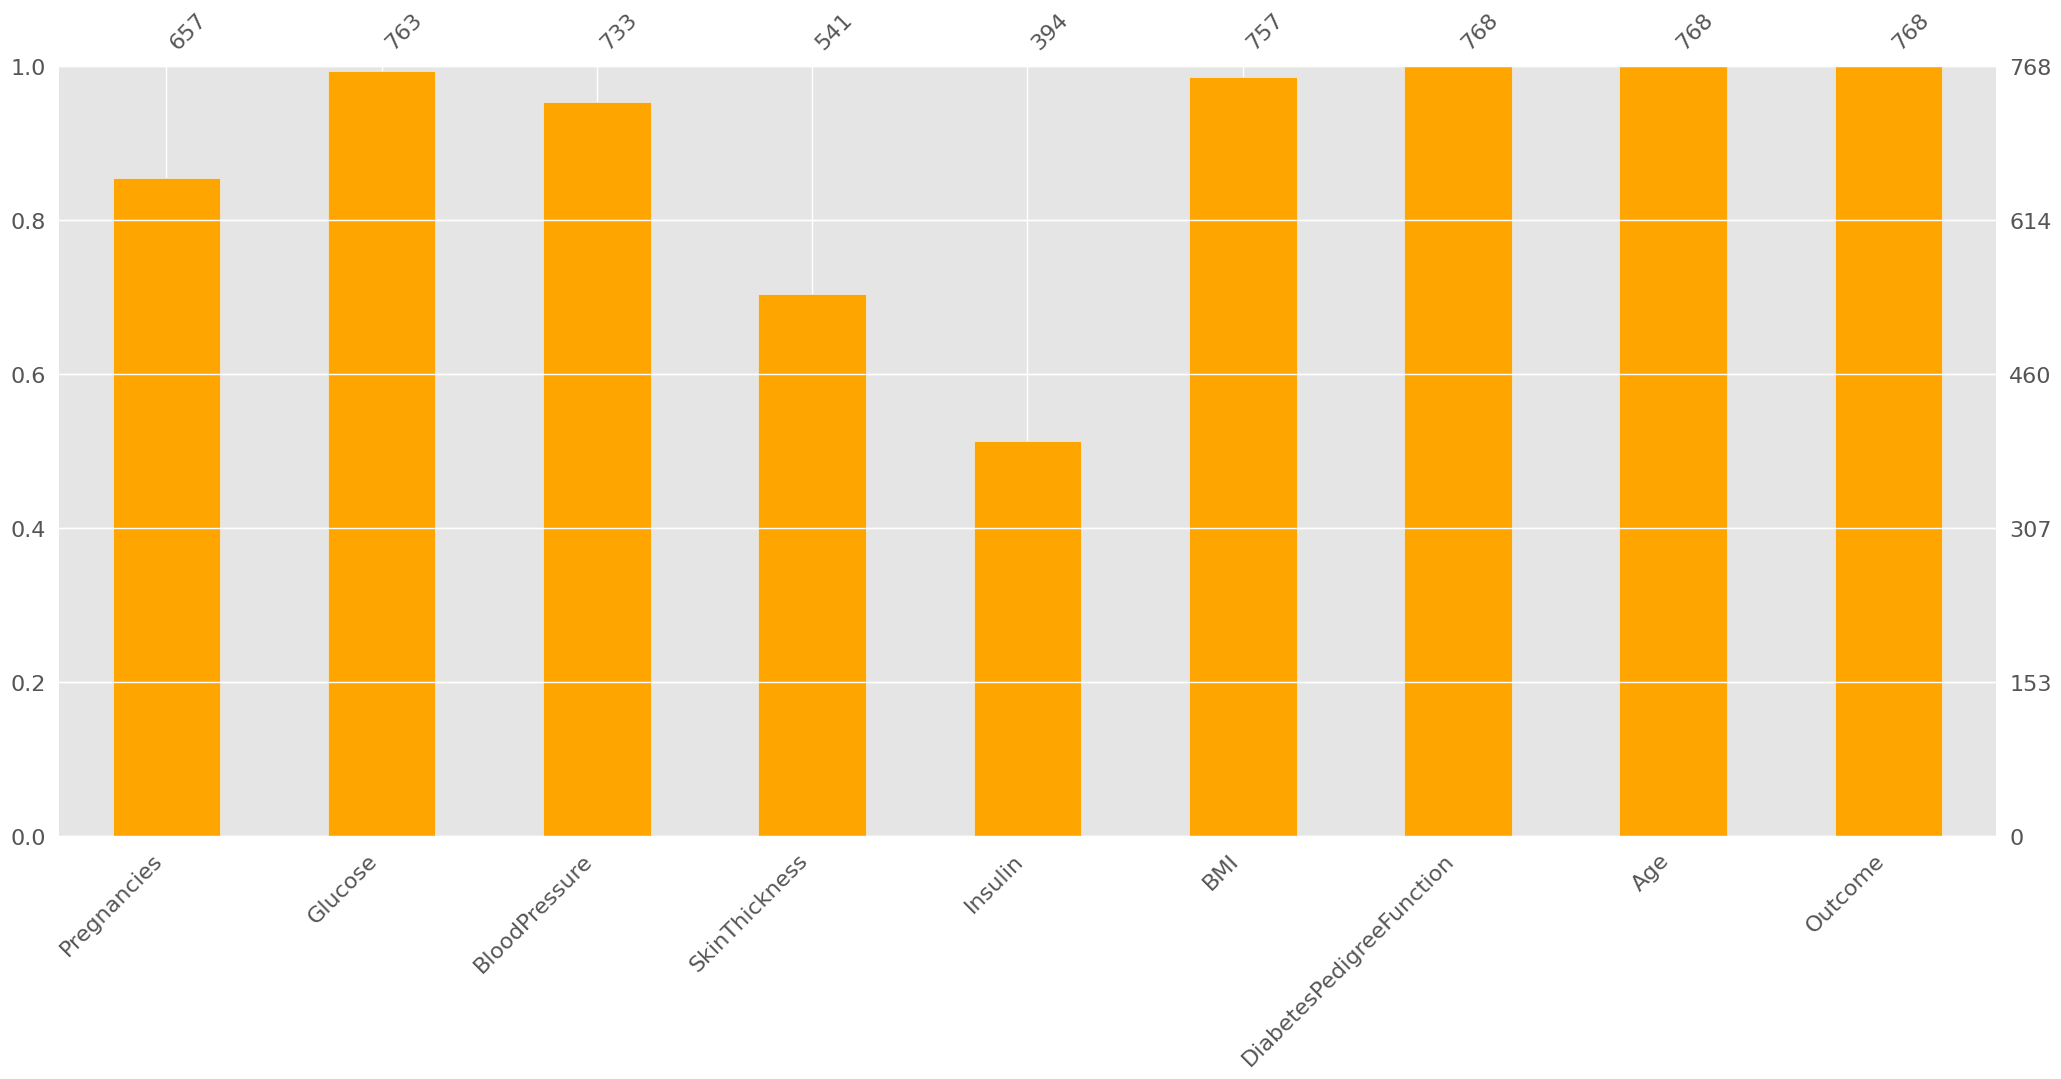

In [ ]:
import missingno as msno
msno.bar(df, color="orange")

FIX MISSING VALUES -
We will replace all the Null values with their medians for each column depending on their outcome


In [ ]:

def median_target(var):
  temp = df[df[var].notnull()] # keeps rows whose dont have null values
  temp = temp[[var, "Outcome"]].groupby("Outcome")[[var]].mean().reset_index()

  return temp



In [ ]:
column = df.columns
column = column.drop('Outcome')

for i in column:
    med = median_target(i)
    df.loc[(df['Outcome'] == 0) & (df[i].isnull()), i] = med[med['Outcome'] == 0][i].values[0]
    df.loc[(df['Outcome'] == 1) & (df[i].isnull()), i] = med[med['Outcome'] == 1][i].values[0]

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


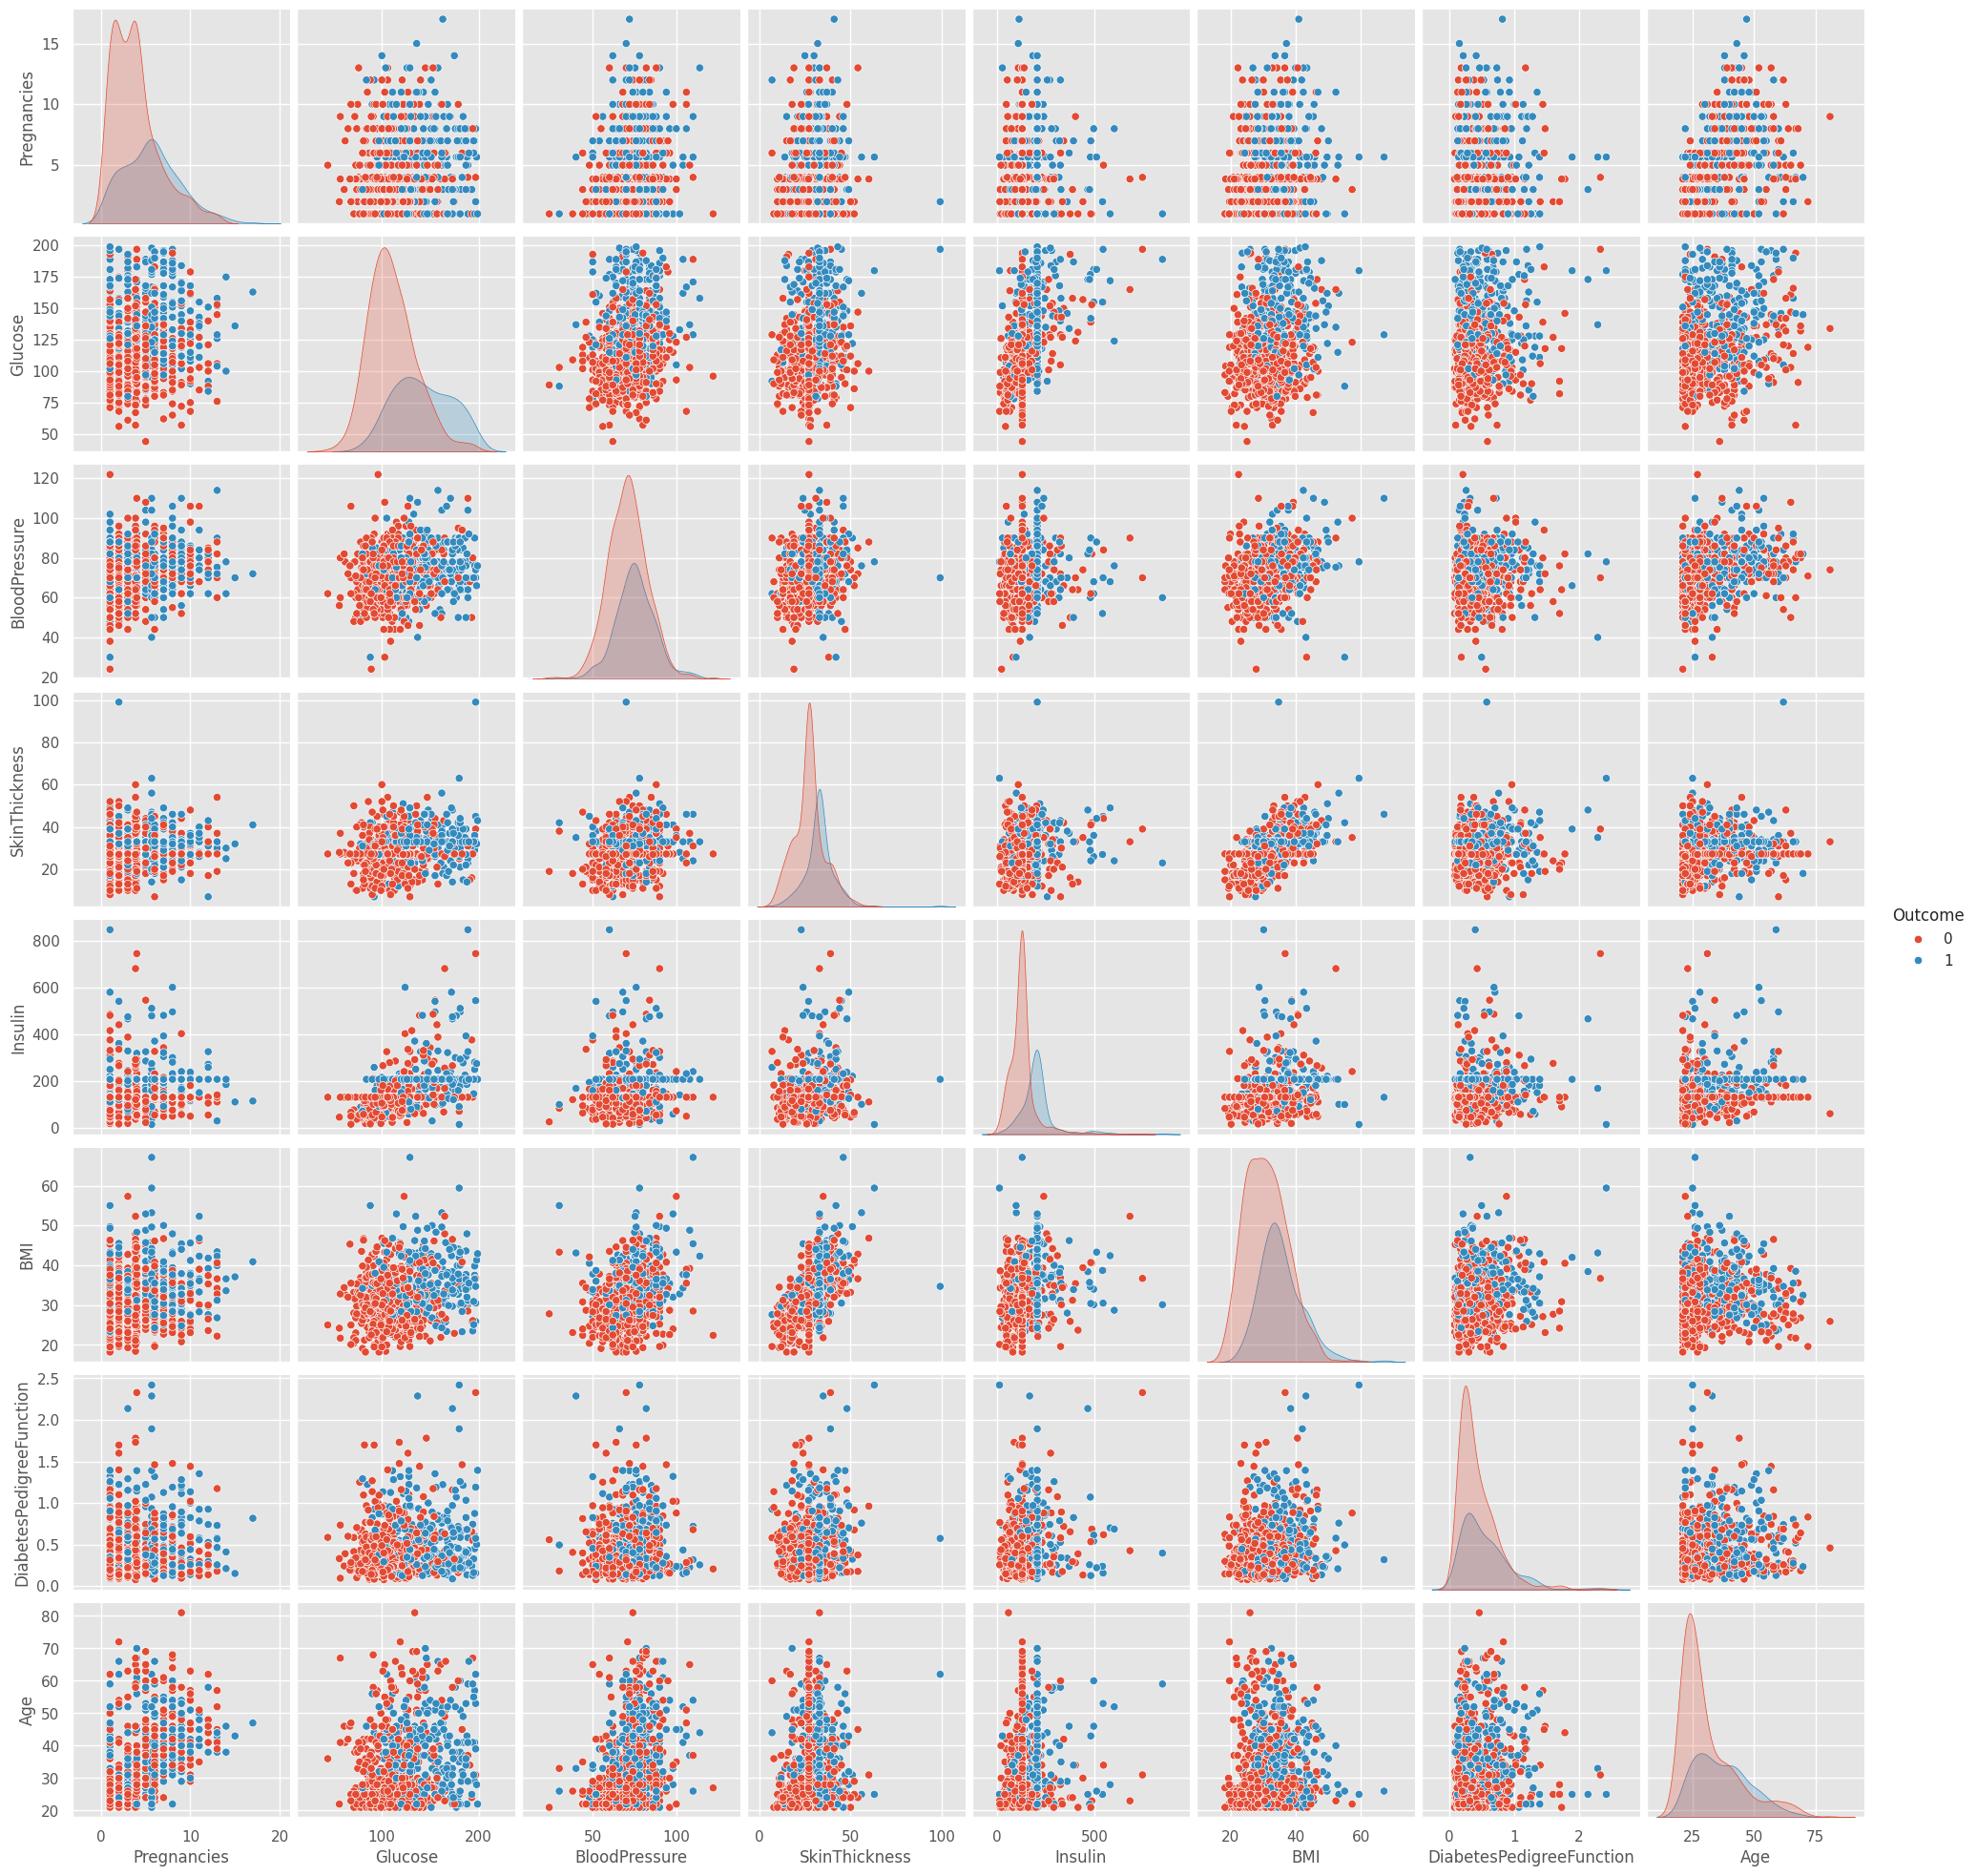

In [ ]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

# Outlier **Detection** - IQR **bold text**

In [ ]:
#IQR measures how spread out the values in a dataset are

for feature in df:
  Q1 =  df[feature].quantile(0.25)   #25% percentile
  Q3 =  df[feature].quantile(0.75)   #75% percentile
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  if df[df[feature] >upper].any(axis=None) and feature != 'Outcome':
    print(feature, 'Yes')
  else:
    print(feature, 'No')

Pregnancies Yes
Glucose No
BloodPressure Yes
SkinThickness Yes
Insulin Yes
BMI Yes
DiabetesPedigreeFunction Yes
Age Yes
Outcome No


In [ ]:
print(df['Outcome'].dtype)
print(df['Outcome'].unique())

int64
[1 0]


In [ ]:
#IQR measures how spread out the values in a dataset are

for feature in df:
  Q1 =  df[feature].quantile(0.25)   #25% percentile
  Q3 =  df[feature].quantile(0.75)   #75% percentile
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  if df[df[feature] < upper].any(axis=None) and feature != 'Outcome':
    print(feature, 'Yes')
  else:
    print(feature, 'No')

Pregnancies Yes
Glucose No
BloodPressure No
SkinThickness No
Insulin No
BMI No
DiabetesPedigreeFunction Yes
Age No
Outcome No


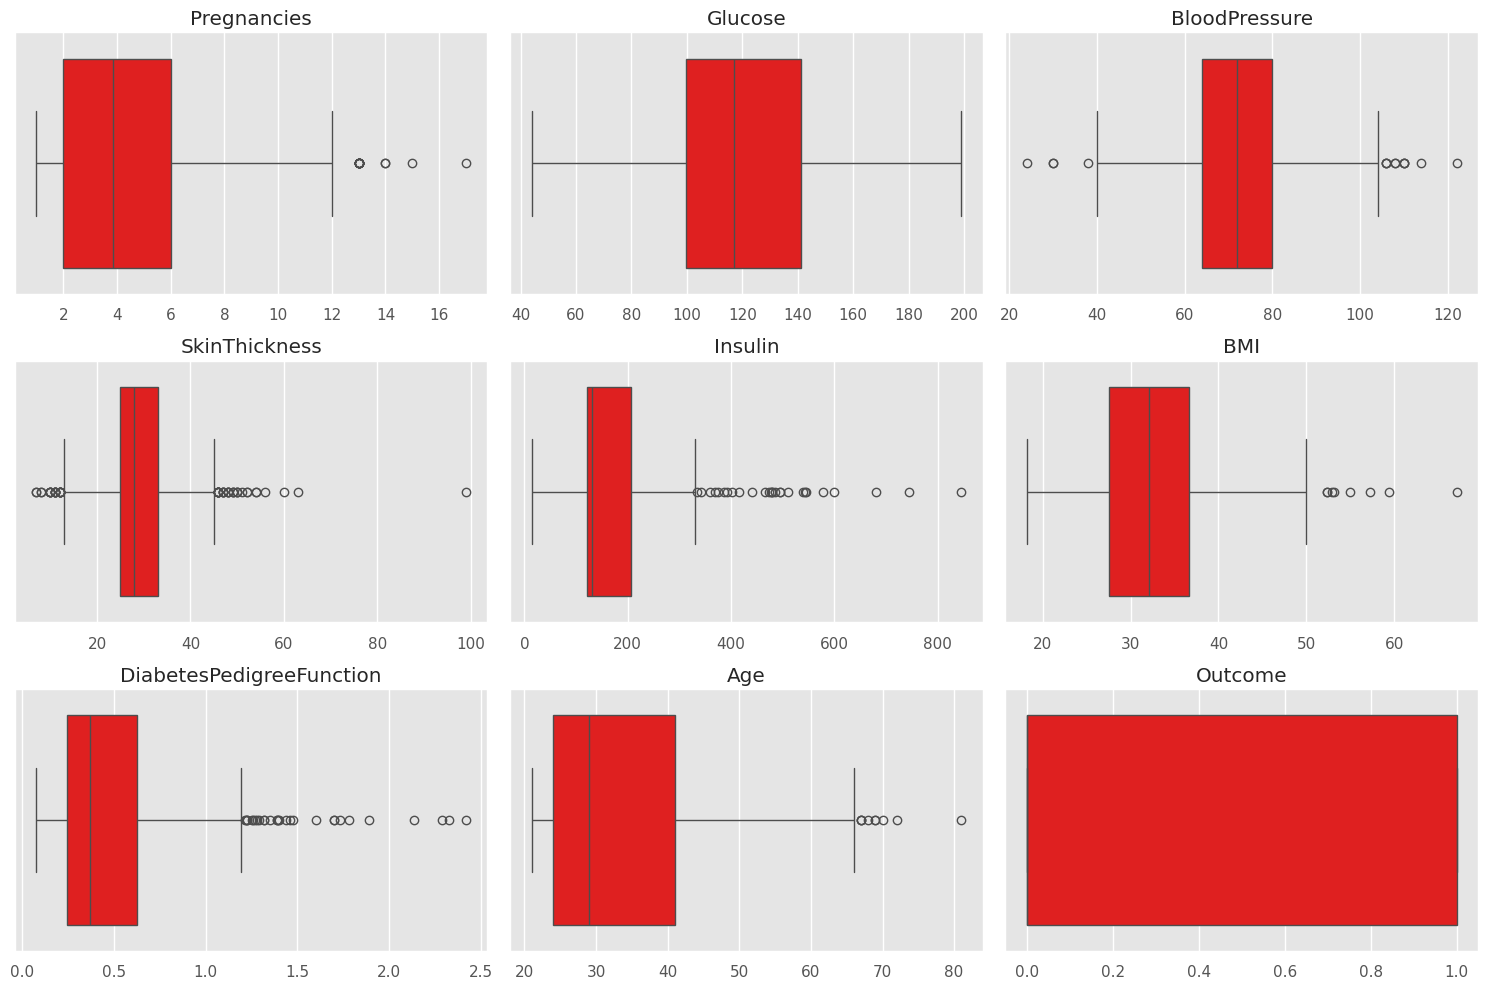

In [ ]:
#plot the data before handling outliers

nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(df.columns):
    sns.boxplot(x=df[feature], color="red", ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')

for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

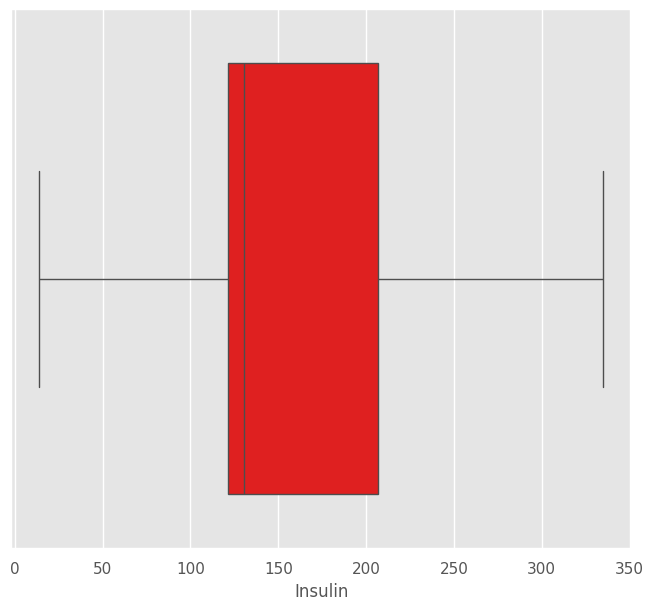

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

# LOF - local outlier factor. There is a possibility IQR missed outliers this LOF can find such outliers

In [ ]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
total = 0
for nums in lof.fit_predict(df):
  if nums == -1:
    total = total + 1
print("The amount of outliers in our data set are", total)

The amount of outliers in our data set are 30


In [ ]:
df.shape

(768, 9)

In [ ]:
#remove outliers using threshold based method
df_score = lof.negative_outlier_factor_
np.sort(df_score)[0:20]



array([-3.27233198, -2.15362009, -2.11349157, -2.06829921, -1.95468392,
       -1.88926758, -1.85453296, -1.85116746, -1.83709478, -1.70730195,
       -1.61387452, -1.61230679, -1.61120066, -1.60618285, -1.59581534,
       -1.58957071, -1.57781584, -1.56780091, -1.56400658, -1.55570645])

In [ ]:
thresold = np.sort(df_score)[7]
thresold

-1.8511674576824575

In [ ]:
outlier = df_score>threshold
df = df[outlier]

In [ ]:
df.shape

(760, 9)

# Feature Engineering


In [ ]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype='category')
NewBMI


,0
0,Underweight
1,Normal
2,Overweight
3,Obesity 1
4,Obesity 2
5,Obesity 3


In [ ]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]



In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1,Obesity 2
1,1.000000,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0,Obesity 2
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1,Obesity 2
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,Obesity 2
4,5.669565,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1,Obesity 3


In [ ]:
NewInsulinScore = pd.Series(["Normal", "Abnormal"], dtype='category')
df["NewInsulinScore"] = NewInsulinScore
df.loc[(df['Insulin'] >= 16) & (df['Insulin'] <= 166), 'NewInsulinScore'] = NewInsulinScore[0]
df.loc[(df['Insulin'] < 16) | (df['Insulin'] > 166), 'NewInsulinScore'] = NewInsulinScore[1]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1,Obesity 2,Abnormal
1,1.000000,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0,Obesity 2,Normal
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1,Obesity 2,Abnormal
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,Obesity 2,Normal
4,5.669565,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1,Obesity 3,Abnormal


In [ ]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype='category')

df['NewGlucose'] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1,Obesity 2,Abnormal,Secret
1,1.000000,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0,Obesity 2,Normal,Normal
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1,Obesity 2,Abnormal,Secret
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,Obesity 2,Normal,Normal
4,5.669565,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1,Obesity 3,Abnormal,Secret


# One Hot encoding

In [ ]:
df = pd.get_dummies(df, columns = ['NewBMI', 'NewInsulinScore', 'NewGlucose'], drop_first=True)


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1,False,True,False,False,False,False,False,False,False,True
1,1.000000,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0,False,True,False,False,False,True,False,True,False,False
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1,False,True,False,False,False,False,False,False,False,True
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,False,True,False,False,False,True,False,True,False,False
4,5.669565,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1,False,False,True,False,False,False,False,False,False,True


In [ ]:
df.astype(int)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72,35,206,33,0,50,1,0,1,0,0,0,0,0,0,0,1
1,1,85,66,29,130,26,0,31,0,0,1,0,0,0,1,0,1,0,0
2,8,183,64,33,206,23,0,32,1,0,1,0,0,0,0,0,0,0,1
3,1,89,66,23,94,28,0,21,0,0,1,0,0,0,1,0,1,0,0
4,5,137,40,35,168,43,2,33,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32,0,63,0,0,1,0,0,0,0,0,0,1,0
764,2,122,70,27,130,36,0,27,0,0,1,0,0,0,1,0,0,1,0
765,5,121,72,23,112,26,0,30,0,0,1,0,0,0,1,0,0,1,0
766,1,126,60,33,206,30,0,47,1,0,1,0,0,0,0,0,0,1,0


# Split the data

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [ ]:
categorial_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
Y = df['Outcome']
X = df.drop(['Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)


In [ ]:
col = X.columns
idx = X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0
1,1.000000,85.0,66.0,29.0,130.287879,26.6,0.351,31.0
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,5.669565,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


Normalize the data

In [ ]:
# we will use RobustSCaler as it will be more easier to normalize our data as a result of our outliers
from sklearn.preprocessing import RobustScaler

#calculates IQR and Media
transformer = RobustScaler().fit(X)
#applies the scaling operation to the data
X = transformer.transform(X)


In [ ]:
X=pd.DataFrame(X, columns = col, index = idx)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.534543,0.756098,0.000,0.875,0.902319,0.160665,0.669707,1.235294
1,-0.715457,-0.780488,-0.375,0.125,0.000000,-0.614958,-0.049511,0.117647
2,1.034543,1.609756,-0.500,0.625,0.902319,-0.980609,0.786971,0.176471
3,-0.715457,-0.682927,-0.375,-0.625,-0.427690,-0.448753,-0.528990,-0.470588
4,0.451935,0.487805,-2.000,0.875,0.444476,1.213296,4.998046,0.235294


In [ ]:
#combine the two data frames
X = pd.concat([X, categorial_df], axis=1)
X = X.astype(int)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,0,0,-2,0,0,1,4,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state=0 )

In [ ]:
#standardize the data, still need to standardize the data after using RobustScaler , because RobustScaler makes the data less senstive to extreme values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **MODEL SELECTION**

*Logistic* *Regression*

In [ ]:
#Logistic Regression

#Training Accuracy
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred_train = log_reg.predict(X_train)
log_accuracy_train = accuracy_score(y_train, log_pred_train)
print("Logistic Regression training:", log_accuracy_train)

#Testing Accuracy
log_pred_test = log_reg.predict(X_test)
final_log_accuracy_test = accuracy_score(y_test, log_pred_test)
print("Logistic Regression testing:", final_log_accuracy_test)

Logistic Regression training: 0.850328947368421
Logistic Regression testing: 0.875


*K*-*Nearest* *Neighbors*

In [ ]:
# KNN

#Training Accuracy
k_n = KNeighborsClassifier()

k_n.fit(X_train, y_train)
k_n_train_pred = k_n.predict(X_train)
k_n_train_acc = accuracy_score(y_train, k_n_train_pred)
print("KNN training:", k_n_train_acc)

#Testing Accuracy
k_n_test_pred = k_n.predict(X_test)
final_k_n_test_acc = accuracy_score(y_test, k_n_test_pred)
print("KNN testing:", final_k_n_test_acc)

KNN training: 0.8634868421052632
KNN testing: 0.8486842105263158


*Support Vector Machine*

In [ ]:
# SVM
#training set
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred_train = svm.predict(X_train)
svm_acc_train = accuracy_score(y_train,svm_pred_train)
print("Support Vector Machine training:", svm_score_train)

#test set
svm_pred_test = svm.predict(X_test)
svm_acc_test = accuracy_score(y_test,svm_pred_test)
print("Support Vector Machine testing:", svm_score_test)

Support Vector Machine training: 0.8980263157894737
Support Vector Machine testing: 0.8486842105263158


In [ ]:
#fine tuning
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}

grid = GridSearchCV(svc, parameter)
grid.fit(X_train, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
grid.best_score_

0.8355913832813983

In [ ]:
svc = SVC(C=20, gamma=0.01, probability=True)
svc.fit(X_train, y_train)
svc_pred_train_ft = svc.predict(X_train)
svc_acc_train_ft = accuracy_score(y_train, svc_pred_train_ft)
print("SVM training after tuning:", svc_acc_train_ft)
svc_pred_test_ft = svc.predict(X_test)
final_svc_acc_test_ft = accuracy_score(y_test, svc_pred_test_ft)
print("SVM testing after tuning:", final_svc_acc_test_ft)


SVM training after tuning: 0.8799342105263158
SVM testing after tuning: 0.8881578947368421


*Decision* *Tree*

In [ ]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
dc_pred_train = dc.predict(X_train)
dc_train_acc = accuracy_score(y_train, dc_pred_train)
print('Decision Tree training:',dc_train_acc)

dc_pred_test = dc.predict(X_test)
dc_test_acc = accuracy_score(y_test, dc_pred_test)
print('Decision Tree testing:', dc_test_acc)

Decision Tree training: 0.9276315789473685
Decision Tree testing: 0.8486842105263158


In [ ]:
#overfitting thus hyperparamter tunning

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}

dc = DecisionTreeClassifier()
grid_dc = GridSearchCV(dc, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_dc.fit(X_train, y_train)
grid_dc.best_params_

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
grid_dc.best_score_

0.8356410256410256

In [ ]:
best_dc = grid_dc.best_estimator_
y_best_train = best_dc.predict(X_train)
y_best_test = best_dc.predict(X_test)
dc_best_train = accuracy_score(y_train, y_best_train)
final_dc_best_test = accuracy_score(y_test, y_best_test)
print("Decision Tree training after paraparameter tuning:", dc_best_train )
print("Decision Tree testing after paraparameter tuning:", final_dc_best_test )

Decision Tree training after paraparameter tuning: 0.8486842105263158
Decision Tree testing after paraparameter tuning: 0.9078947368421053


*Random* *Forest*

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)

rf.fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_pred_train)
print('Decision Tree training:',rf_train_acc)

rf_pred_test = rf.predict(X_test)
final_rf_test_acc = accuracy_score(y_test, rf_pred_test)
print('Decision Tree testing:', final_rf_test_acc)

Decision Tree training: 0.8930921052631579
Decision Tree testing: 0.875


*Gradient* *Boosting* *Classifier*

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)
gbc_pred_train = gbc.predict(X_train)
gbc_train_acc = accuracy_score(y_train, gbc_pred_train)
print('Gradient Boosting Classifier training:',gbc_train_acc)

gbc_pred_test = gbc.predict(X_test)
gbc_test_acc = accuracy_score(y_test, gbc_pred_test)
print('Gradient Boosting Classifier testing:', gbc_test_acc)

Gradient Boosting Classifier training: 0.8930921052631579
Gradient Boosting Classifier testing: 0.8618421052631579


In [ ]:
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}
grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)


Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(loss='exponential',
                                                  n_estimators=150),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [ ]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [ ]:
grid_search_gbc.best_score_

0.8437158469945356

In [ ]:
best_gbc = grid_search_gbc.best_estimator_
y_best_train = best_gbc.predict(X_train)
y_best_test = best_gbc.predict(X_test)
gbc_best_train = accuracy_score(y_train, y_best_train)
final_gbc_best_test = accuracy_score(y_test, y_best_test)
print("Gradient Boosting Classifier training after paraparameter tuning:", gbc_best_train )
print("Gradient Boosting Classifier testing after paraparameter tuning:", final_gbc_best_test )

Gradient Boosting Classifier training after paraparameter tuning: 0.8914473684210527
Gradient Boosting Classifier testing after paraparameter tuning: 0.881578947368421


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_train)
xgb_acc_train = accuracy_score(y_train, xgb_pred)
print('xgboost training:',xgb_acc_train)


xgb_pred_test = xgb.predict(X_test)
final_xgb_acc_test = accuracy_score(y_test, xgb_pred_test)
print('xgboost testing:', final_xgb_acc_test)


xgboost training: 0.8832236842105263
xgboost testing: 0.8947368421052632


# Model Decision

                Model  Training Accuracy  Testing Accuracy
0  LogisticRegression           0.850329          0.875000
1                 KNN           0.863487          0.848684
2                 SVM           0.879934          0.888158
3        DecisionTree           0.848684          0.907895
4        RandomForest           0.893092          0.875000
5    GradientBoosting           0.891447          0.881579
6                 XGB           0.883224          0.894737


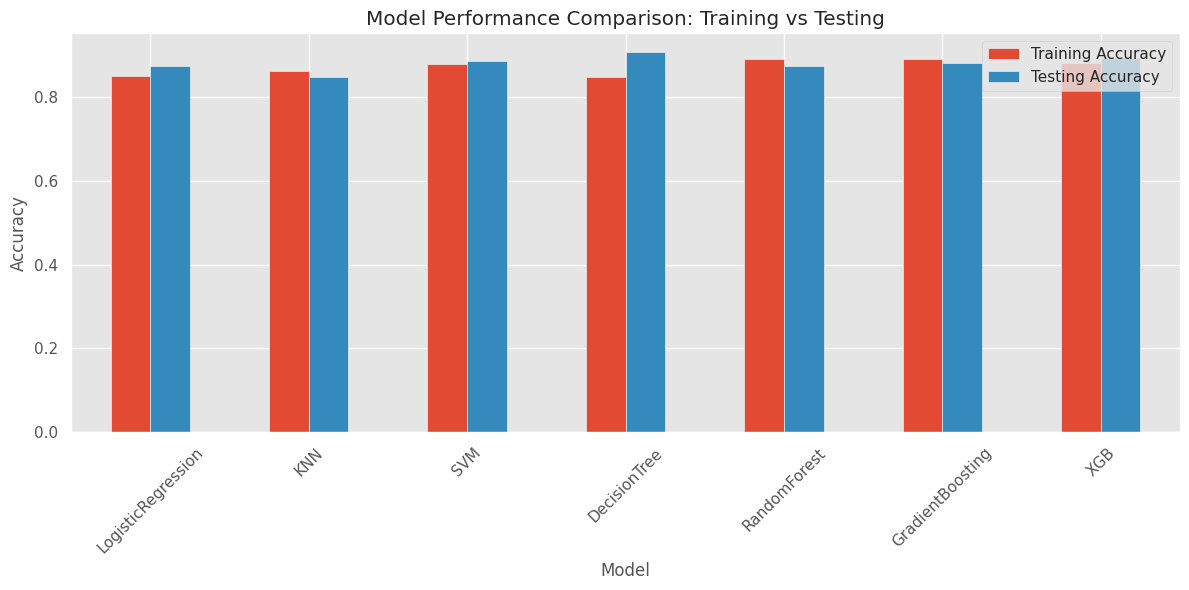

In [ ]:
# Define model names and their accuracy scores
model_names = [
    'LogisticRegression', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'XGB'
]

# Example accuracy scores for training and testing
train_accuracies = [log_accuracy_train, k_n_train_acc, svc_acc_train_ft, dc_best_train, rf_train_acc, gbc_best_train, xgb_acc_train]
test_accuracies = [final_log_accuracy_test, final_k_n_test_acc, final_svc_acc_test_ft, final_dc_best_test, final_rf_test_acc, final_gbc_best_test, final_xgb_acc_test]

# Create a DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': train_accuracies,
    'Testing Accuracy': test_accuracies
})

# Print the DataFrame to verify
print(results_df)

# Plot
results_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison: Training vs Testing')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Thus the model we will use will be the DecisionTree Classifier